# Pr√°ctica 2: Aprendizaje autom√°tico

El objetivo de esta pr√°ctica es aplicar los distintos algoritmos de aprendizaje autom√°tico disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La pr√°ctica consta de __2 notebooks__ que se entregar√°n en las tareas de entrega habilitadas en el Campus Virtual. Este notebook corresponde al apartado de __clustering__.

Lo m√°s importante en esta pr√°ctica no es el c√≥digo Python, sino el an√°lisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorar√°n trozos de c√≥digo o gr√°ficas sin ning√∫n tipo de contexto o explicaci√≥n__.

Finalmente, recuerda establecer el par√°metro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no var√≠en entre ejecuciones).

__N√∫mero de grupo: J__

__Nombres de los estudiantes: Diego Mart√≠nez L√≥pez y Dami√°n Benasco S√°nchez__

#¬†Apartado 1: Clustering

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la pr√°ctica.

El conjunto de datos contiene por cada fila los datos de un pr√©stamo que fue concedido por una empresa de cr√©dito p2p. Las variables que caracterizan el pr√©stamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en d√≥lares
  - `purpose` es el prop√≥sito para el que se solicit√≥ el pr√©stamo
  - `revenue` son los ingresos anuales en d√≥lares de la persona que solicit√≥ el pr√©stamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicit√≥ el pr√©stamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicit√≥ el pr√©stamo. A mayor puntuaci√≥n, mayor solvencia, y adem√°s se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Cr√©dito aceptable
    - 680-740: Buen cr√©dito
    - 740-850: Excelente cr√©dito

  -`home_ownership_n` es una variable categ√≥rica que indica la situaci√≥n de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que est√° hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categor√≠a que agrega otras posibilidades

- `emp_length` es una variable ordinal, no es estrictamente num√©rica, ya que el valor 0 denota que no consta informaci√≥n, los valores entre 1 y 10 indican una permanencia inferior a X a√±os, y el valor 11 indica una permanencia superior a 10 a√±os.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumpli√≥ (incurri√≥ en *default*) o no el pr√©stamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `emp_length` y `Default` son en realidad categ√≥ricas, debes indic√°rselo t√∫.

En primer lugar, cargamos el dataframe en una variable llamada df_csv, e indicamos expl√≠citamente que las variables home_ownership_n, emp_length_n y Default son variables categ√≥ricas.

Adem√°s importamos todas las librer√≠as que necesitaremos ahora y m√°s adelante.

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [9]:
df_csv = pd.read_csv('prestamos.csv', dtype={
        'home_ownership_n': 'category',
        'emp_length_n': 'category',  # o 'emp_length_n' si tu CSV tiene esta cabecera
        'Default': 'category'
    })
df_csv

loan_amnt   purpose   revenue  dti_n  fico_n home_ownership_n  \
0          32000       car  135000.0  18.93   687.0         MORTGAGE   
1          32000       car   90000.0   9.29   822.0         MORTGAGE   
2          30000       car   95000.0   1.34   722.0             RENT   
3          25750       car  230000.0   6.42   747.0         MORTGAGE   
4          25200       car   72000.0  30.95   692.0              OWN   
...          ...       ...       ...    ...     ...              ...   
13789       1275  vacation   42000.0  31.89   792.0             RENT   
13790       1200  vacation   36000.0  12.27   747.0         MORTGAGE   
13791       1000  vacation   76000.0  25.26   702.0         MORTGAGE   
13792       1000  vacation   32000.0  17.70   747.0         MORTGAGE   
13793       1000  vacation   55000.0  14.90   682.0         MORTGAGE   

      emp_length_n Default  
0                1       0  
1               10       1  
2               11       0  
3               11       0  
4               11       0  
...            ...     ...  
13789            0       0  
13790            8       0  
13791           11       0  
13792            0       0  
13793           11       0  

[13794 rows x 8 columns]

## 2) An√°lisis de los datos

### 2.1) Num√©ricos

Analiza razonadamente las distribuciones de cada una de las variables num√©ricas (medias, desviaciones t√≠picas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersi√≥n, coeficientes de correlaci√≥n, ...).

En primer lugar, vamos a extraer los datos estad√≠sticos de cada una de las variables num√©ricas, como pueden ser la media, la desviaci√≥n t√≠pica o los rangos. Para ello, utilizamos la funci√≥n de pandas describe, y seleccionamos √∫nicamente las variables num√©ricas.

In [10]:
df_csv.describe(include='number').transpose()

count          mean           std     min      25%        50%  \
loan_amnt  13794.0  14507.833116   9037.938271  1000.0   7300.0  12000.000   
revenue    13794.0  79737.299507  56463.579892  7000.0  48000.0  68000.000   
dti_n      13794.0     18.825106      9.795986     0.0     12.2     18.085   
fico_n     13794.0    699.106822     32.825754   662.0    672.0    692.000   

                  75%         max  
loan_amnt  20000.0000    40000.00  
revenue    97000.0000  1650000.00  
dti_n         24.7575      190.87  
fico_n       717.0000      847.50

A continuaci√≥n vamos a realizar dos procesos. En primer lugar vamos a generar histogramas y a analizar cada una de las variables por separado, para posteriormente terminar analizando pares de variables y la correlaci√≥n entre ellas.

Procedemos a generar los histogramas para cada una de las variables:

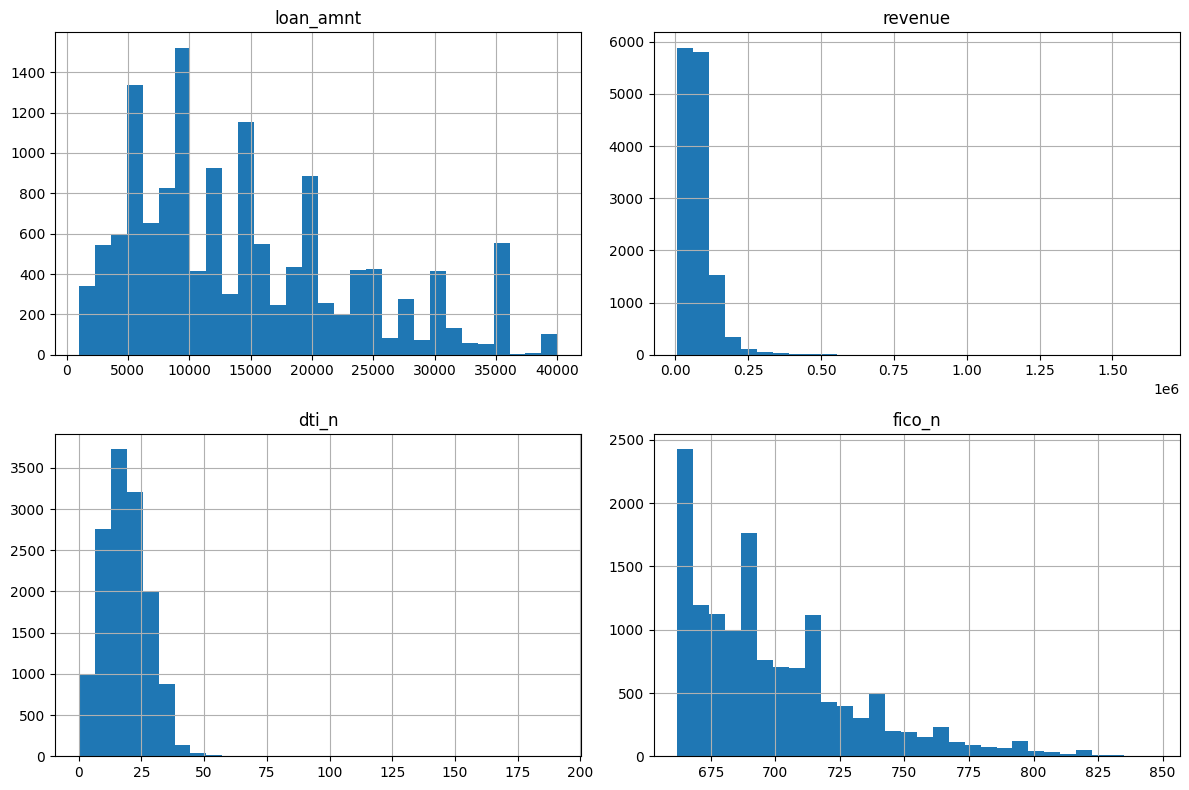

In [11]:
df_csv.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

Antes de analizar cada estad√≠stico de cada variable, vamos a comentar un poco los histogramas generados arriba. Para cada histograma, el eje x muestra los rangos de valores que toma la variable que se est√° representando en √©l, y el eje y muestra la frecuencia o n√∫mero de observaciones  que caen dentro de cada rango.
En primer lugar, podemos observar que en el hitograma del loan_amnt, que es la cantidad de dinero pedido como pr√©stamo, el grueso de datos est√°n en torno a 10000 d√≥lares. Es decir, del total de pr√©stamos, la mayor parte de la poblaci√≥n ha solicitado un pr√©stamos de 10 mil d√≥lares. Adem√°s, se observan unos pocos datos extremos, de una cantidad elevada de pr√©stamo, lo cual como veremos m√°s adelante, tiene relevancia en los estad√≠sticos de esta variable.
Por otro lado en cuanto a la revenue, que representa los ingresos anuales, podemos ver que la mayor parte de la poblaci√≥n tiene unos ingresos de entre 20000 y 100000 d√≥lares, habiendo pocos individuos con unos ingresos mayores a 100000 d√≥lares. Esto tendr√° reflejo en la media de esta variable, adem√°s de en la mediana que se situar√°n en torno a estos valores.
Adem√°s en el histograma del dti_n, que representa el endeudamiento, podemos ver que la mayor parte de la poblaci√≥n tiene un endeudamiento del 20 por ciento sobre el total de sus ingresos, que no es una cantidad muy elevada, aunque hay unos pocos individuos con un soobreendeudamiento. 
Por √∫ltimo, en el histograma del fico_n, que representa la solvencia de cada uno de los individuos que pidieron un pr√©stamos, podemos ver que el grueso de ellos est√° en 650 puntos y al avanzar se va reduciendo el n√∫mero de individuos con esa puntuaci√≥n. Esto refleja que en general la gente tiene un cr√©dito aceptable, aunque alg√∫n individuo podr√≠a aproximarse a un cr√©dito con riesgo.

Tras extraer esta informaci√≥n de los histogramas, vamos a interpretar los estad√≠sticos de cada una de las variables, que nos dar√°n m√°s informaci√≥n a cerca de los datos que poseemos.

Loan_amnt (dinero prestado): podemos observar que la mayor√≠a de los pr√©stamos se sit√∫an entre 7.300 y 20.000 USD, con un valor m√°ximo de 40.000 USD, confirmando las conclusiones obtenidas directamente a partir del hitograma.Adem√°s, la mediana (12.000) es bastante inferior al m√°ximo, lo que sugiere una distribuci√≥n algo sesgada a la derecha, es decir, hay menos pr√©stamos en cantidades muy altas, pero estos pocos valores altos empujan la media hacia arriba. Esto es debido a que la media es un estad√≠stico muy sensible a valores extremos, por lo que un dato elevado de cr√©dito tiene un gran efecto sobre la misma.
Adem√°s, El valor m√≠nimo de 1.000 USD puede representar micropr√©stamos, pero aunque 1000 es el valor m√°s peque√±o, hay pocos datos detal cantidad.
Por √∫ltimo, el rango (max-min) es de 39.000, lo cual, junto con la desviaci√≥n t√≠pica (~9.038), indica una variabilidad importante en las cantidades solicitadas.

Revenue (ingresos anuales): Hay mucha dispersi√≥n en los ingresos pues el std, que es la desviaci√≥n t√≠pica, es de aproximadamente 56 mil d√≥lares. El intervalo intercuart√≠lico va desde 48k a 97k, pero el m√°ximo asciende hasta 1,65 millones. Esto indica una distribuci√≥n muy asim√©trica  con un grupo peque√±o de usuarios de ingresos muy altos. Es esperable que, en t√©rminos de correlaci√≥n, los ingresos tengan cierta relaci√≥n con el importe del pr√©stamo solicitado o con otros factores de solvencia, lo cual verificaremos a continuaci√≥n con el an√°lisis bivariante.
Asimismo, aqu√≠ la media (79.737) tambi√©n es superior a la mediana (68.000), lo que indica igualmente una asimetr√≠a a la derecha; hay menos personas con ingresos muy elevados, pero estos ingresos extremos (por encima de 1 mill√≥n de USD) aumentan considerablemente la media.
El IQR va de 48.000 a 97.000 USD, lo que sugiere que la mitad de los clientes gana entre 48k d√≥lares al a√±o y 97k d√≥lares al a√±o. 
Por √∫ltimo, cabe destacar, que el valor m√°ximo al ser muy elevado, y dado que la mayor√≠a de la poblaci√≥n gana menos de 100k d√≥lares anuales, es probable que existan unos pocos casos muy at√≠picos en la distribuci√≥n de ingresos.

Dti_n (porcentaje de endeudamiento): podemos observar que la mayor√≠a de los valores se concentra entre 12% y 25%, como vimos anteriormente en el histograma, lo cual es un endeudamento razonable. Sin embargo, hay casos extremos (endeudamiento muy alto, superior al 100%), lo cual puede indicar situaciones financieras de elevado riesgo. Estos valores tan altos (hasta 190,87%) podr√≠an responder a clientes con deudas muy elevadas o con errores en la declaraci√≥n de ingresos. Es importante resaltar que para el clustering puede que sea conveniente caparlos, transformarlos (por ejemplo, con transformaci√≥n logar√≠tmica) o tratarlos como outliers.
Asimismo, el valor m√≠nimo 0% podr√≠a implicar casos en los que oficialmente no se observa deuda previa o se registran ingresos muy altos respecto a la deuda total, por lo que el endeudamiento es despreciable.
Por √∫ltimo, cabe destacar que el hecho de que la mediana (18,09%) sea muy cercana a la media (18,83%) sugiere que, salvo por unos pocos valores muy elevados, la mayor√≠a de la distribuci√≥n se concentra alrededor de ese 18‚Äì19%, es decir a diferencia de los dos casos anteriores, no tenemos casos at√≠picos tan extremos que empujen la distribuci√≥n hacia la derecha. 




Fico_n (indicador de solvencia): observamos que aunque el rango de FICO (te√≥ricamente) va de 300 a 850, en este conjunto los valores se concentran entre 662 y 847. Vemos que los cuartiles se sit√∫an en 672 y 717, lo que sugiere que la mayor parte de los solicitantes est√° por encima de 660, es decir, en la parte media o alta del rango de credit scores. La distribuci√≥n no se extiende a puntajes muy bajos (por debajo de 660), por lo que podr√≠a haber cierto sesgo de selecci√≥n, es decir, ser√≠a conveniente obtener m√°s datos de personas con menor solvencia para evitar el sesgo en el posterior entrenamiento del modelo. Adem√°s, por esto podemos deducir que el conjunto de pr√©stamos puede provenir de un subset de clientes que ya cumpl√≠an un m√≠nimo de solvencia.
Por otro lado, la mediana (692) est√° algo por debajo de la media (699), nuevamente apuntando a cierta asimetr√≠a a la derecha, aunque no muy acusada, y la desviaci√≥n t√≠pica (32,83) indica un rango de variaci√≥n moderado.
Por √∫ltimo, dado que el FICO es una variable muy importante para el riesgo crediticio, ser√≠a interesante correlacionarla con Default (si est√° disponible) y con la antig√ºedad en el empleo.


Procedemos ahora a hacer un an√°lisis entre pares de variables, para ver cuales est√°n correlacionadas y de qu√© manera. Para ello, procedemos mediante el an√°lisis bivariante, que analiza presisamente el grado de relaci√≥n entre pares de variables.

### An√°lisis bivariante

#### Matriz de correlaci√≥n

Recordemos que la matriz de correlaci√≥n es una matriz donde la posici√≥n (i,j) almacena el grado de correlaci√≥n o √≠ndice de Pearson entre las variables i y j. Recordemos que este var√≠a de -1 a 1, y qye valores negativos representan una correlaci√≥n negativa (cuando i aumenta j disminuye y viceversa) mientras que valores positivos representa una correlaci√≥n positiva (si i aumenta j tambi√©n aumenta), mientras que valores cercanos a 0 indican una correlaci√≥n baja o nula.

In [12]:
corr_matrix = df_csv.select_dtypes(include='number').corr()
print(corr_matrix)

           loan_amnt   revenue     dti_n    fico_n
loan_amnt   1.000000  0.424460  0.034134  0.090869
revenue     0.424460  1.000000 -0.137616  0.091204
dti_n       0.034134 -0.137616  1.000000 -0.057580
fico_n      0.090869  0.091204 -0.057580  1.000000


Podemos observar en la matriz de correlaci√≥n que el par de variables que tienen una mayor relaci√≥n son la cantidad de dinero prestado con los ingresos anuales, que tienen un √≠ndice de Pearson de 0,42. Por tanto, como est√°n positivamente relacionadas, a mayor cr√©dito mayores ser√°n los ingresos anuales (y viceversa), y a menor cr√©dito menores ingresos anuales (y viceversa).
Por otro lado, tambi√©n podemos observar una leve correlaci√≥n entre los ingresos anuales y el √≠ndice de endeudamiento, con un √≠ndice de -0,14. Como este es negativo, a mayores ingresos menor porcentaje de endeudamiento (y viceversa), y a mayores ingresos menor el porcentaje de endeudamiento (y viceversa).
Esto refleja que, aunque cuanto mayores sean los ingresos de una persona, mayor es el cr√©dito que solicita, los ingresos son mayores al aumento en la cantidad del pr√©stamo.
Por √∫ltimo, cabe destacar que el resto de √≠ndices son muy pr√≥ximos a cero, por lo que reflejan una correlaci√≥n muy baja entre el resto de pares de variables.
Resumiendo, el par m√°s correlacionado es loan_amnt vs. revenue, revenue vs. dti_n tiene una relaci√≥n negativa, aunque no muy marcada y el resto de correlaciones son muy bajas, por lo que las asociaciones lineales entre esas variables son d√©biles o inexistentes.

#### Diagramas de dispersi√≥n

Procedemos ahora a graficar los diagramas de dispersi√≥n entre pares de variables, para posteriormente analizar los resultados obtenidos, que veremos que reflejar√°n la misma informaci√≥n que la descrita en la matriz de correlaci√≥n.

In [13]:
dic_colors = {
    'MORTGAGE': 'green',
    'RENT': 'red',
    'OWN': 'blue',
    'OTHER': 'orange'
}

# Mapeo temporal para la visualizaci√≥n
colors = df_csv['home_ownership_n'].map(dic_colors)

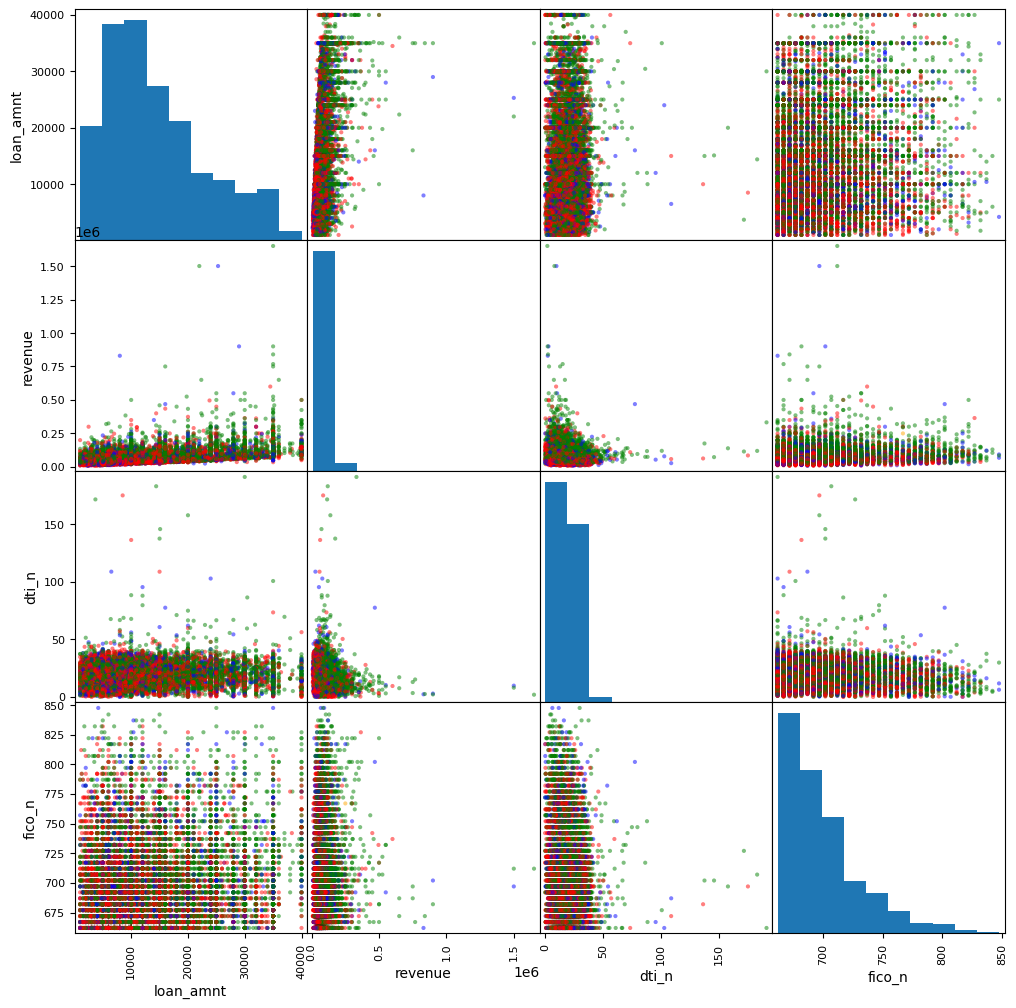

In [14]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

numeric_cols = ['loan_amnt', 'revenue', 'dti_n', 'fico_n']

scatter_matrix(
    df_csv[numeric_cols],
    figsize=(12, 12),
    diagonal='hist',
    c=colors  # Importante usar 'c=colors'
)
plt.show()

In [15]:
colors

0        green
1        green
2          red
3        green
4         blue
         ...  
13789      red
13790    green
13791    green
13792    green
13793    green
Name: home_ownership_n, Length: 13794, dtype: category
Categories (4, object): ['green', 'orange', 'blue', 'red']

Observamos que hemos graficado la matriz de gr√°ficas, donde en la diagonal se han graficado los histogramas de cada variable, que ya lo hemos comentado anteriormente, y en el resto de posiciones los diagramas de dispersi√≥n de cada par de variables. Como ya hemos analizado los histogramas, procedemos a analizar los diagramas de dispersi√≥n de pares de variables. Adem√°s cabe destacar que hemos coloreado cada individuo en color en funci√≥n al home_ownership, para ver si, aunque esta sea una variable categ√≥rica, podemos ir sacando alguna conclusi√≥n extra para el siguiente apartado.


Par loan_amnt/revenue: recordemos que el histograma nos dec√≠a que este par era el que m√°s correlacionado (positivamente) estaba. Esto se ve reflejado en el diagrama de dispersi√≥n, pues observamos que al ir aumentando el loan_amnt aumenta la cantidad de ingresos anuales. Adem√°s podemos ver reflejado que para pr√©stamos peque√±os el los ingresos anuales son bastante m√°s reducidos, y que la mayor parte de los individuos tienen pares de ingresos y cr√©ditos moderados. 
Adem√°s en cuanto al home_ownership, podemos ver que la mayor parte de la poblaci√≥n con cr√©dito moderado e ingresos moderados son de color rojo, lo que indica que est√°n de alquiler, mientras que al ir aumentando los ingresos y el cr√©dito se agrupan m√°s individuos de color verde (hipotecados) y de color azul (con casa en propiedad). Esto muestra que los individuos con un mayor poder adquisitivo piden cr√©ditos m√°s elevados e invierten con mayor probabilidad en inmuebles

Par revenue/dti_n: podemos observar que el diagrama de dispersi√≥n refleja de nuevo las conclusiones de la matriz de correlaci√≥n. As√≠, vemos que a mayores ingresos menor es el porcentaje de endeudamiento de los individuos. Adem√°s podemos ver reflejado que la mayor√≠a de individuos tiene un ingreso moderado, pero hay varios con un porcentaje de endeudamiento elevado. Esto se debe a que, como hab√≠amos visto, como el √≠ndice de Pearson es negativo, a menores ingresos, mayor es el √≠ndice de endeudamiento. Esto se ve con los puntos concentrados en la esquina inferior izquierda del diagrama de dispersi√≥n, evidenciando de nuevo individuos con ingresos reducidos y un porcentaje de endeudamiento un poco elevado.
Por √∫ltimo, en cuanto a los colores de los individuos, vemos que todos los que est√°n de alquiler o hipotecados tienen unos ingresos m√°s bien moderados e √≠ndices de endeudamiento un poco mayores, mientras que los propietarios tienen ingresos elevados y bajos niveles de endeudamiento

Resto de pares: podemos observar que, como hab√≠amos concluido con la matriz de correlaci√≥n, el resto de diagrama de fases de pares de variables no muestran ninguna informaci√≥n significativa, pues como hab√≠amos visto, el resto de pares de variables ten√≠an un √≠ndice de correlaci√≥n cercano a cero, por lo que no estaban pr√°cticamente relacionadas.


### 2.2) Categ√≥ricos

Analiza razonadamente las distribuciones de los valores de las variables categ√≥ricas incluyendo un diagrama de frecuencias y comentando lo m√°s destacable.

Procedemos ahora a analizar las distribuciones de los valores de las variables categ√≥ricas,y para ello vamos a incluir un diagrama de frecuencias y vamos a analizar el mismo para obtener conclusiones sobre las variables.


Distribuci√≥n de la variable 'home_ownership_n':
home_ownership_n
MORTGAGE    6850
RENT        5349
OWN         1586
OTHER          9
Name: count, dtype: int64


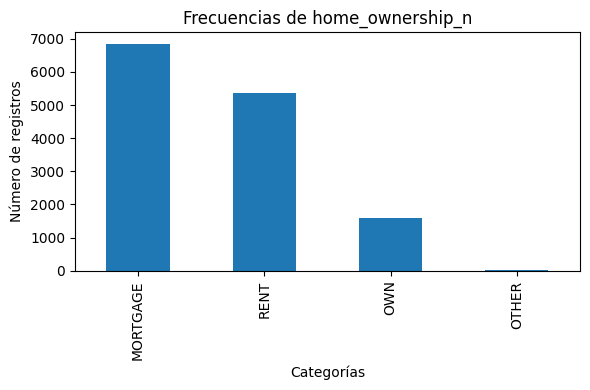


Distribuci√≥n de la variable 'emp_length_n':
emp_length_n
11    4612
3     1232
1     1174
4     1174
2      909
0      875
6      860
5      815
9      599
7      580
10     494
8      470
Name: count, dtype: int64


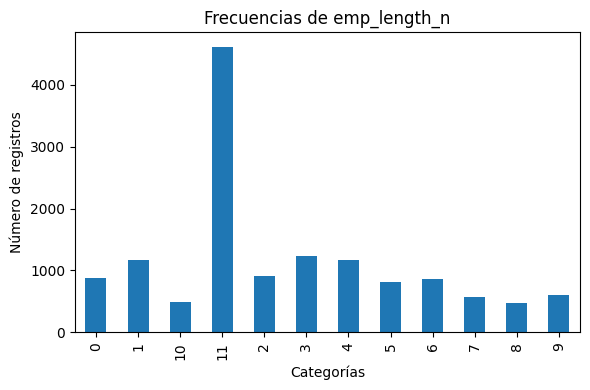


Distribuci√≥n de la variable 'Default':
Default
0    10785
1     3009
Name: count, dtype: int64


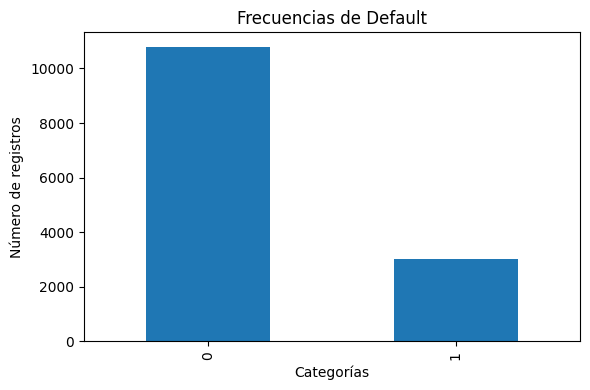

In [16]:
import matplotlib.pyplot as plt

# Definimos las columnas categ√≥ricas
categorical_cols =['home_ownership_n','emp_length_n', 'Default']

# Recorremos cada columna categ√≥rica para:
# 1) Mostrar la distribuci√≥n de valores en la consola
# 2) Dibujar un gr√°fico de barras con la frecuencia de cada categor√≠a
for col in categorical_cols:
    print(f"\nDistribuci√≥n de la variable '{col}':")
    print(df_csv[col].value_counts(dropna=False))
    
    # Para variables puramente categ√≥ricas sin orden, basta con plot.bar()
    # En el caso de 'emp_length_n' (que es ordinal), podr√≠amos querer .sort_index()
    # si los valores son 0,1,2,...,11. Ajusta seg√∫n necesites.

    if col == 'emp_length_n':
        # Ordenamos por √≠ndice si te interesa que aparezcan en orden 0,1,2,...,11
        df_csv[col].value_counts(dropna=False).sort_index().plot.bar(figsize=(6,4))
    else:
        df_csv[col].value_counts(dropna=False).plot.bar(figsize=(6,4))
    
    plt.title(f"Frecuencias de {col}")
    plt.xlabel("Categor√≠as")
    plt.ylabel("N√∫mero de registros")
    plt.tight_layout()
    plt.show()


A partir de los diagramas de frecuencias (histogramas) vamos a analizar cada una de las variables categ√≥ricas.

Home_ownership_n (situaci√≥n de vivienda): observamos que la gran parte de la poblaci√≥n vive hipotecado, lo cual puede coincidir con que pidan cr√©ditos. Posteriormente vemos que el siguiente grupo (el 40% aproximadamente) es el de la gente que vive de alquiler, que recordemos que en el estudio anterior se correspond√≠a en mayor cantidad con ingresos anuales bajos. Por √∫ltimo tenemos los grupos de poblaci√≥n que poseen casas en propiedad, que es bastante reducido (enn torno a un 11%), y como hab√≠amos visto se correspond√≠a con poblaci√≥n con rentas elevadas, y el grupo other, que vemos que es pr√°cticamente despreciable, pues el n√∫mero de personas qe se enmarcan en este grupo es √≠nfimo.

Emp_length_n (permanencia en trabajo): la categor√≠a ‚Äú11‚Äù (m√°s de 10 a√±os de antig√ºedad) es la m√°s numerosa (4.612 registros), mientras que el resto de categor√≠as se reparten en torno a 1‚Äì10 a√±os de antig√ºedad, con valores entre ~500 y ~1.200 registros cada una. Por otro lado, la categor√≠a ‚Äú0‚Äù (no consta informaci√≥n) tambi√©n aparece 875 veces, lo cual no es despreciable.
Que el valor ‚Äú11‚Äù sea tan frecuente puede indicar que un gran porcentaje de solicitantes tiene m√°s de 10 a√±os en la misma empresa o simplemente lleva lo suficiente en el mercado laboral como para clasificarse en ese grupo.
Hay una distribuci√≥n razonablemente amplia entre 1‚Äì10 a√±os, con una presencia significativa de quienes llevan 3 o 4 a√±os, y 1 a√±o tambi√©n sobresale.
Un 875 de los registros no tienen informaci√≥n de antig√ºedad laboral (0), lo que puede complicar un an√°lisis de riesgo (falta de dato).
En un an√°lisis posterior, ser√≠a interesante ver c√≥mo se relacionan estas categor√≠as con la variable Default (si la estabilidad laboral influye en la morosidad).


Default (incumplimiento de pr√©stamo) : recordemos que es la variable objetivo, que indica con 1 si se incumpli√≥ el pr√©stamos y con 0 si no se incumpli√≥.
No incumple (0): 10.785 registros (78% del total)
Incumple (1): 3.009 registros (22% del total)
Aproximadamente un 22% de los pr√©stamos han terminado en incumplimiento (default), mientras que un 78% no.
Esta distribuci√≥n indica que el dataset no est√° extremadamente desbalanceado (no es un 95% vs. 5%), pero s√≠ muestra una diferencia clara: hay m√°s gente que cumple que la que incumple.
De cara a un modelo predictivo o un an√°lisis de riesgo, conviene tener en cuenta este 22% como tasa de default.

Conclusiones generales
Situaci√≥n de vivienda (home_ownership_n)

Mayores grupos: MORTGAGE (hipoteca) y RENT (alquiler). Propietarios absolutos (OWN) son una minor√≠a (aunque no despreciable).
‚ÄúOTHER‚Äù es casi anecd√≥tico.
Antig√ºedad en el empleo (emp_length_n)

Un cuarto del conjunto tiene m√°s de 10 a√±os de antig√ºedad (categor√≠a 11).
El resto se reparte entre 1‚Äì10 a√±os y un 6‚Äì7% no aporta dato (0).
Incumplimiento (Default)

~22% de los solicitantes incurri√≥ en default, y ~78% no lo hizo.
Permite un an√°lisis interesante sobre qu√© factores (p.ej., la antig√ºedad laboral, el tipo de vivienda, etc.) se asocian con un mayor o menor riesgo de incumplimiento.


## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables verdaderamente num√©ricas. Crea un nuevo dataframe que s√≥lo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de pr√©stamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Primero, creamos un nuevo dataframe que solo contenga las variables loan_amnt, revenue, dti_n y fico_n, como se nos pide en el enunciado.

In [17]:
df_numeral = df_csv[['loan_amnt', 'revenue', 'dti_n', 'fico_n']]
df_numeral

loan_amnt   revenue  dti_n  fico_n
0          32000  135000.0  18.93   687.0
1          32000   90000.0   9.29   822.0
2          30000   95000.0   1.34   722.0
3          25750  230000.0   6.42   747.0
4          25200   72000.0  30.95   692.0
...          ...       ...    ...     ...
13789       1275   42000.0  31.89   792.0
13790       1200   36000.0  12.27   747.0
13791       1000   76000.0  25.26   702.0
13792       1000   32000.0  17.70   747.0
13793       1000   55000.0  14.90   682.0

[13794 rows x 4 columns]

A la hora de aplicar k-Means, el uso de distancias eucl√≠deas hace imprescindible que todas las variables num√©ricas que intervienen en el clustering est√©n en una escala comparable. De lo contrario, las diferencias en una variable con un rango mayor dominar√≠an el c√°lculo de distancias, y se formar√≠a la agrupaci√≥n con base en esa variable, eclipsando el aporte de las dem√°s.
Recordemos que el algoritmo de k-Means, dado el valor de k inicializa k centros de los clusters de forma aleatoria, para luego ir asignando a cada punto la pertenencia a un cluster que est√© m√°s cercano, actualizando posteriormente el centro de los clusters y repitiendo este proceso hasta que la actualizaci√≥n de los centros de los clusters no var√≠en.
Adem√°s, cabe destacar que la distancia m√°s comunmente utilizada en el K-Means es la distancia eucl√≠dea. Si observamos las 4 variables, vemos que el loan_amnt toma valores de 1000 a 40000, el revenue de 7000 a 1650000, el dt_n de 0 a 18 y el fico_n de 660 a 850. Por tanto, revenue tiene un rango muy amplio mientras que loan_amnt, aunque es menor que revenue, puede alcanzar 40.000, que sigue siendo bastante superior al rango de fico_n o dti_n.
Por otra parte, dti_n y fico_n quedan en escalas m√°s peque√±as comparadas con revenue o incluso loan_amnt.
Por lo tanto, para evitar que la variable con mayor rango (especialmente revenue, pero tambi√©n loan_amnt) ‚Äúpese‚Äù mucho m√°s en la distancia eucl√≠dea, se deber√≠amos reescalar (o estandarizar) las cuatro variables antes de aplicar k-Means, para que as√≠ al calcular la distancia eucl√≠dea no pesen m√°s unas variables que otras. 
Para ello, debemos decir si es mejor reescalar o estandarizar. Recordemos que MinMaxScaler escala linealmente cada variable para que sus valores queden t√≠picamente en el intervalo [0,1]. Adem√°s tiene la ventaja de que se iterpreta f√°cil y que comprime los datos en un rango fijo, pero como desventaja tiene que (al igual que suced√≠a con la media) es muy sensible a valores extremos, por lo que si tenemos un valor muy alto de alguna variable, como ocurr√≠a en el revenue, va a arrastar al resto de valores que se comprimir√°n muy cerca del 0. Es por ello que, como tenemos valores extremos, no vamos a elegir reescalar los datos, sino que vamos a aplicar el StandarScaler, que explicaremos a continuaci√≥n.
El StandarScaler Transforma cada valor x a ùë•‚àíùúá/ùúé. Como ventaja tiene que iguala la influencia de cada variable en el c√°lculo de distancias, robusteciendo la comparaci√≥n cuando hay grandes diferencias de rango, aunque de nuevo si hay valores muy pronunciados, puede que la media y desviaci√≥n t√≠pica se vean afectadas. Aun as√≠, suele ser menos problem√°tico que en MinMax, y en muchos escenarios es la opci√≥n por defecto para k-Means.

De esta manera, procedemos a aplicarle el StandarScaler a cada una de las 4 variables que tenemos en nuestro dataset.

In [18]:
from sklearn.preprocessing import StandardScaler

# (1) Accedemos al array interno
X = df_numeral.values

# (2) Instanciamos el escalador
scaler = StandardScaler()

# (3) Ajustamos y transformamos los datos
X_scaled = scaler.fit_transform(X)

# (4)creamos un DataFrame para ver el resultado
df_scaled = pd.DataFrame(X_scaled, columns=df_numeral.columns)
df_scaled

loan_amnt   revenue     dti_n    fico_n
0       1.935486  0.978767  0.010708 -0.368834
1       1.935486  0.181764 -0.973404  3.743939
2       1.714188  0.270320 -1.784990  0.697440
3       1.243931  2.661329 -1.266392  1.459065
4       1.183075 -0.137037  1.237786 -0.216509
...          ...       ...       ...       ...
13789  -1.464196 -0.668372  1.333747  2.829990
13790  -1.472495 -0.774639 -0.669187  1.459065
13791  -1.494624 -0.066192  0.656915  0.088141
13792  -1.494624 -0.845484 -0.114858  1.459065
13793  -1.494624 -0.438127 -0.400700 -0.521159

[13794 rows x 4 columns]

## 4) Encontrar el n√∫mero √≥ptimo de clusters

Decide razonadamente el n√∫mero √≥ptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un n√∫mero excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el √≠ndice davies_boulding y el coeficiente silhouette en funci√≥n del n√∫mero de clusters.

Vamos primero a generar el algoritmo de K-Means con un n√∫mero de clusters del 2 al 10.

In [40]:
def plot_clusters(X, labels=None, centers=None):
    """ Funci√≥n auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros par√°metros de la funci√≥n scatter son las coordenadas de los puntos,
    # el par√°metro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,3], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

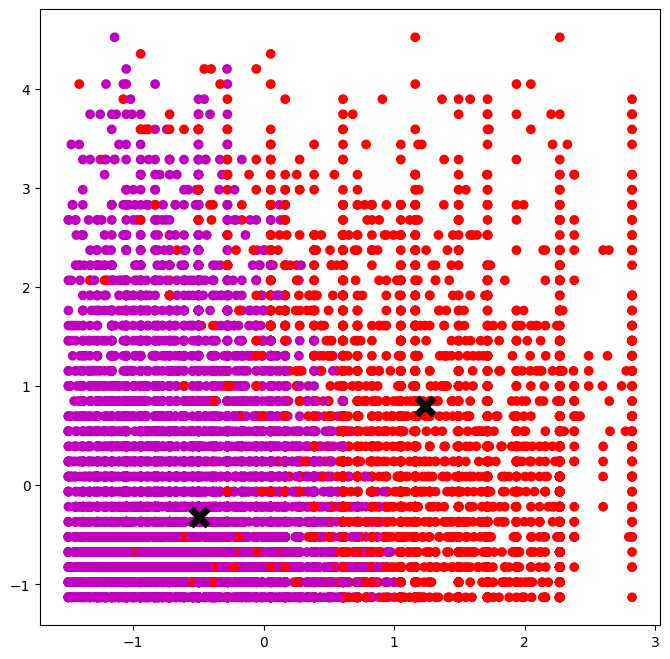

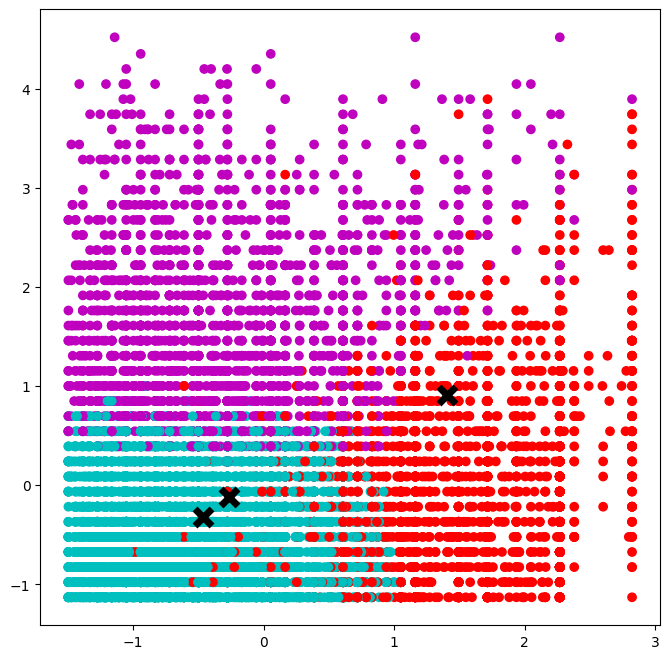

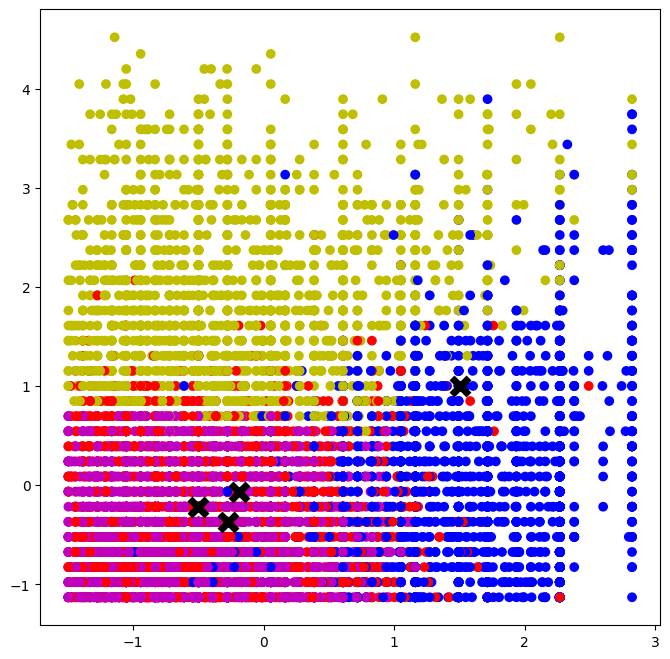

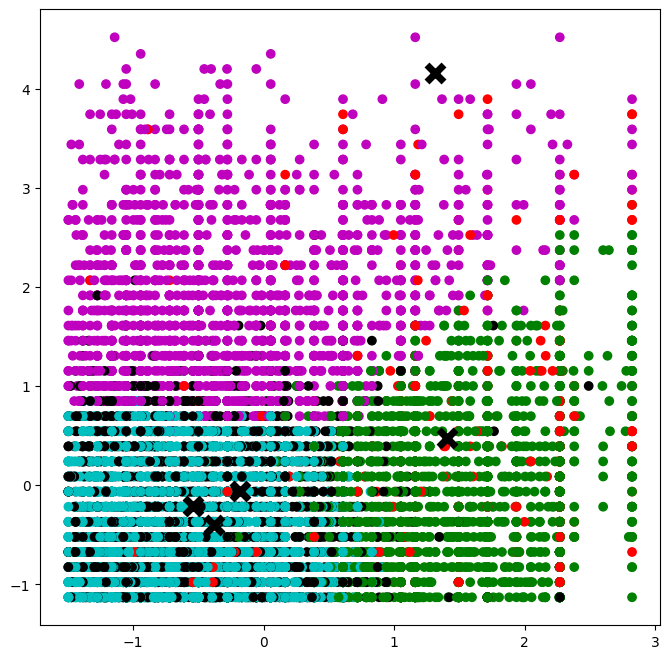

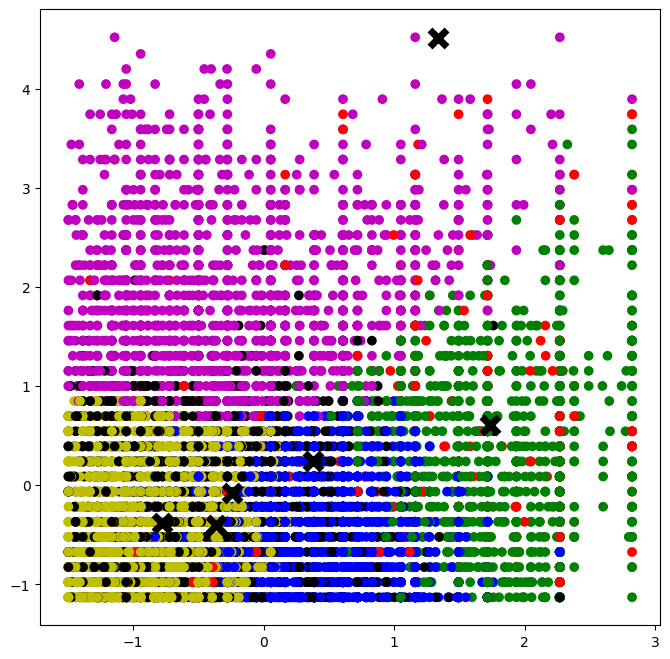

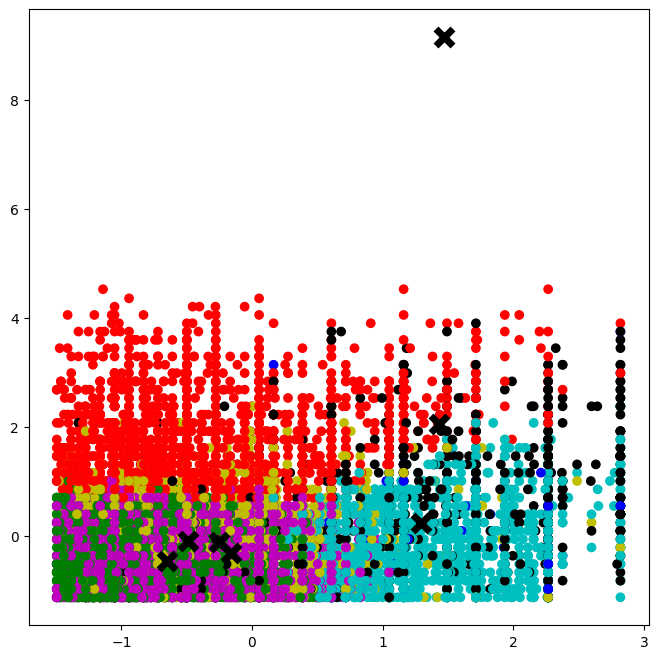

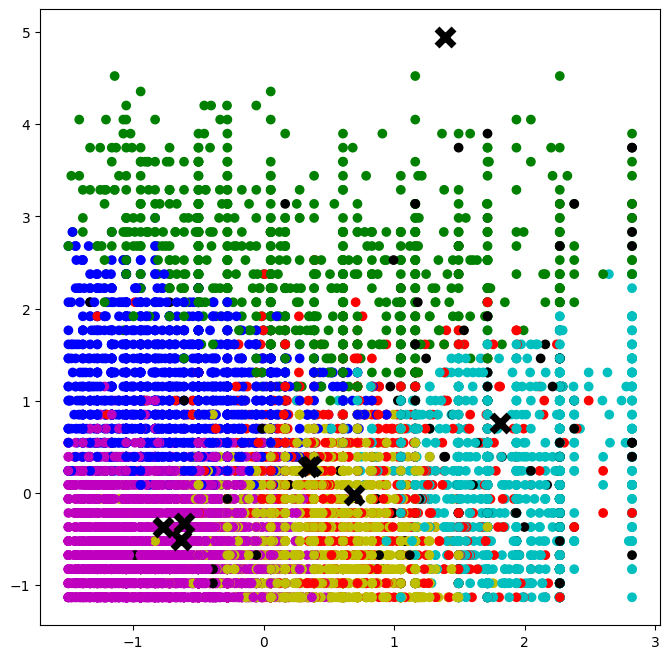

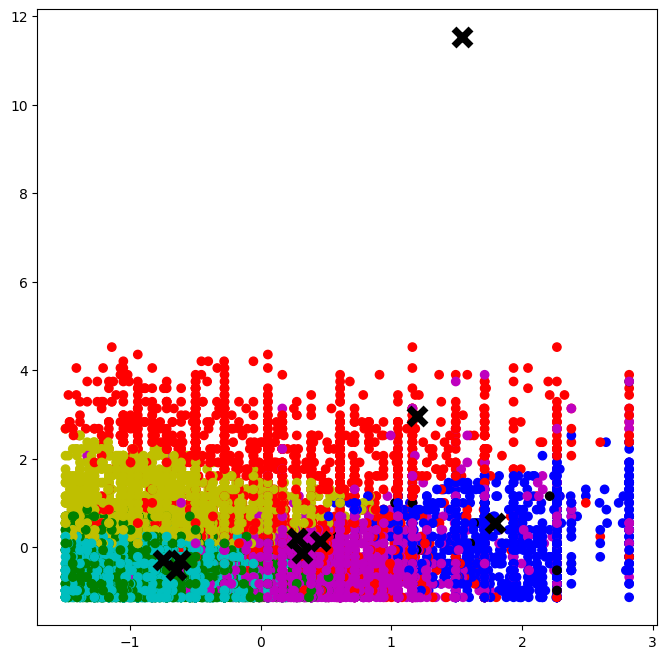

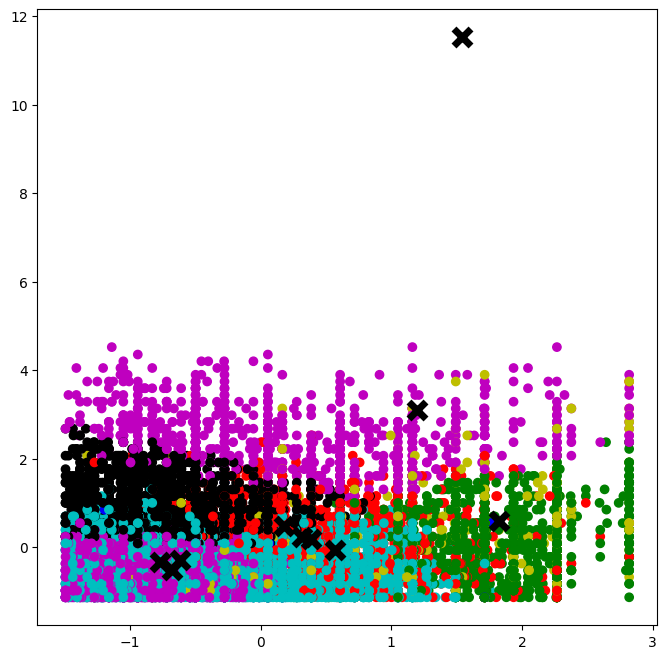

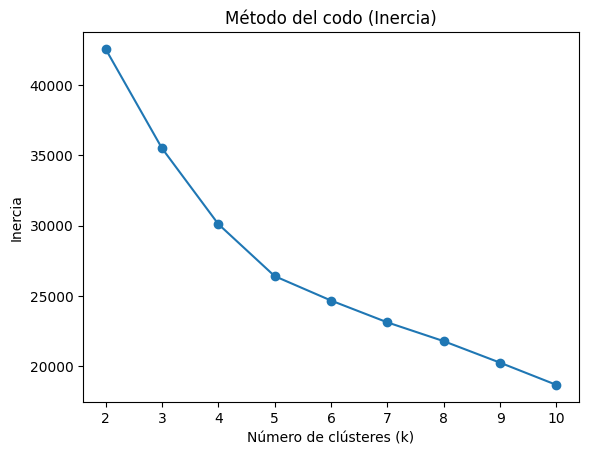

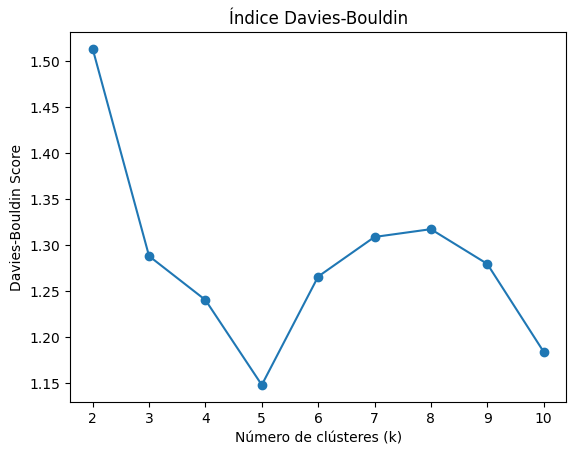

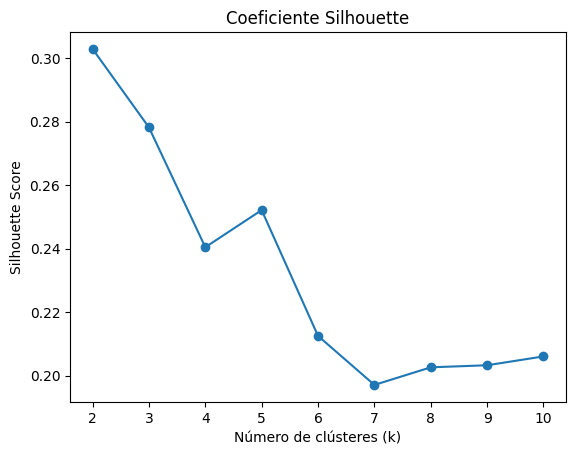

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA


# Suponemos que X_scaled es el array con todas tus variables escaladas
# (loan_amnt, revenue, dti_n, fico_n) ya preprocesadas.

inertias = []
db_scores = []
sil_scores = []

K_range = range(2, 11)  # desde k=2 hasta k=10

for k in K_range:
    kmeans = KMeans(init='random', n_clusters=k, random_state=333)
    labels = kmeans.fit_predict(X_scaled)
    #kmeans.fit(X_scaled)
    # 1) Inercia (sum of squared distances to centroids)
    inertias.append(kmeans.inertia_)
    
    # 2) Davies-Bouldin (m√°s bajo es mejor)
    db = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db)
    
    # 3) Coeficiente Silhouette (m√°s alto es mejor)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    plot_clusters(X_scaled, kmeans.labels_, kmeans.cluster_centers_);
    #pca = PCA(n_components=2)
    #X_pca = pca.fit_transform(X_scaled)   # X_scaled con tus 4 variables
    # X_pca[:,0] y X_pca[:,1] ser√°n los ejes principales
    #plot_clusters(X_pca, labels=kmeans.labels_, centers=kmeans.cluster_centers_)

# --- Diagrama del codo (Inercia) ---
plt.plot(K_range, inertias, marker='o')
plt.title("M√©todo del codo (Inercia)")
plt.xlabel("N√∫mero de cl√∫steres (k)")
plt.ylabel("Inercia")
plt.show()

# --- Davies-Bouldin ---
plt.plot(K_range, db_scores, marker='o')
plt.title("√çndice Davies-Bouldin")
plt.xlabel("N√∫mero de cl√∫steres (k)")
plt.ylabel("Davies-Bouldin Score")
plt.show()

# --- Coeficiente Silhouette ---
plt.plot(K_range, sil_scores, marker='o')
plt.title("Coeficiente Silhouette")
plt.xlabel("N√∫mero de cl√∫steres (k)")
plt.ylabel("Silhouette Score")
plt.show()

__Comentarios__: Como podemos observar el mejor valor del n√∫mero de clusters es k=5. Esto es debido a que en el diagrama de codo es el valor donde la gr√°fica cambia de tendencia y a partir del cual el aumento de clusters no produce un cambio significativo en la inercia. Por otro lado si nos fijamos en la gr√°fica del √≠ndice de Davies-Bouldin, en el cual cuanto m√°s peque√±o el valor obtenido para una partici√≥n, mejor, tenemos que para k=5 tenemos el m√≠nimo del √≠ndice, lo que de nuevo nos indica que es la mejor elecci√≥n de n√∫mero de clusters.
Por √∫ltimo, si ahora nos fijamos en el gr√°fico del coeficiente de Silhouette, k=5 toma un valor positivo, lo cual nos indica de nuevo que es una buena elecci√≥n de n√∫mero de cl√∫steres, pues recordemos que  toma un valor entre 1 y -1, donde valores 
cercanos a 0 indican la existencia de cluster  solapados, valores negativos indica una
asignaci√≥n incoherente y valores positivos indican particiones buenas.

## 5) Descripci√≥n de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido m√°s de 3 elige 3 de ellos que sean bastante diferentes entre s√≠.

Para hacerlo estudia sus descriptores estad√≠sticos y dales un sentido dentro del contexto del problema. ¬øQu√© perfil de pr√©stamos quedan en cada cluster? Seg√∫n dicho perfil, ¬øqu√© cluster te parece que tendr√° una mayor tasa de "default"? Corrob√≥ralo calculando para cada cluster la proporci√≥n de pr√©stamos que acabaron en "default".

Pinta el diagrama de dispersi√≥n en funci√≥n de cada par de variables usando colores diferentes para cada cluster. ¬øQu√© clusters se separan mejor y en funci√≥n de qu√© variables? ¬øy cu√°les se confunden m√°s?

__Cuidado__: para poder interpretar correctamente los datos necesitas que est√©n en su escala original. Si decidiste escalar los datos, deber√°s ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos as√≠ que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [45]:
kmeans_final = KMeans(init='random', n_clusters=5, random_state=333)
labels = kmeans_final.fit_predict(X_scaled)
# Si df_csv tiene el MISMO orden de filas que X_scaled
df_csv['cluster'] = labels
df_csv.groupby('cluster')[['loan_amnt','revenue','dti_n','fico_n']].describe().transpose()

cluster                     0              1              2              3  \
loan_amnt count  3.020000e+02    2885.000000    4993.000000    3636.000000   
          mean   2.634793e+04   27173.535529    9633.551973   11048.783003   
          std    8.879728e+03    5808.520592    4757.496822    5500.538588   
          min    2.500000e+03   10550.000000    1000.000000    1000.000000   
          25%    2.000000e+04   22775.000000    6000.000000    6500.000000   
          50%    2.800000e+04   26000.000000   10000.000000   10000.000000   
          75%    3.500000e+04   32000.000000   12800.000000   15000.000000   
          max    4.000000e+04   40000.000000   25000.000000   37000.000000   
revenue   count  3.020000e+02    2885.000000    4993.000000    3636.000000   
          mean   3.149067e+05  106691.865023   67661.096299   57181.593848   
          std    1.701477e+05   36307.364509   31804.466111   25903.146052   
          min    1.890000e+05   25000.000000    8400.000000    7000.000000   
          25%    2.332500e+05   80000.000000   45000.000000   40000.000000   
          50%    2.600000e+05  100000.000000   61000.000000   52000.000000   
          75%    3.237500e+05  130000.000000   84000.000000   70000.000000   
          max    1.650000e+06  230000.000000  221000.000000  332500.000000   
dti_n     count  3.020000e+02    2885.000000    4993.000000    3636.000000   
          mean   1.164467e+01      19.008565      13.002612      28.962453   
          std    7.628159e+00       7.518383       5.027625       9.394541   
          min    1.200000e-01       0.220000       0.000000      19.000000   
          25%    6.577500e+00      13.850000       9.340000      24.150000   
          50%    1.031500e+01      18.870000      13.380000      27.360000   
          75%    1.556750e+01      23.920000      17.130000      31.802500   
          max    7.743000e+01      62.700000      23.530000     190.870000   
fico_n    count  3.020000e+02    2885.000000    4993.000000    3636.000000   
          mean   7.121987e+02     696.126516     683.661326     689.680143   
          std    3.833703e+01      23.692207      17.141733      20.769959   
          min    6.620000e+02     662.000000     662.000000     662.000000   
          25%    6.820000e+02     677.000000     667.000000     672.000000   
          50%    7.070000e+02     692.000000     682.000000     687.000000   
          75%    7.320000e+02     712.000000     697.000000     707.000000   
          max    8.270000e+02     792.000000     727.000000     782.000000   

cluster                      4  
loan_amnt count    1978.000000  
          mean    12889.092518  
          std      7466.126348  
          min      1000.000000  
          25%      7000.000000  
          50%     12000.000000  
          75%     17000.000000  
          max     40000.000000  
revenue   count    1978.000000  
          mean    76463.266471  
          std     36071.419637  
          min      9036.000000  
          25%     50000.000000  
          50%     70000.000000  
          75%     97000.000000  
          max    225000.000000  
dti_n     count    1978.000000  
          mean       15.716678  
          std         7.737271  
          min         0.000000  
          25%         9.972500  
          50%        15.460000  
          75%        20.720000  
          max        45.880000  
fico_n    count    1978.000000  
          mean      757.771739  
          std        26.296601  
          min       717.000000  
          25%       737.000000  
          50%       752.000000  
          75%       772.000000  
          max       847.500000

__Comentarios:__ Tenemos 5 cl√∫steres y vamos a tratar de describir que tipo de pr√©stamos trata de describir cada uno de ellos. Vamos a interpretar 4 de ellos, los 4 primeros cl√∫steres. Asi tenemos:

    Cluster 0: Vemos en sus estad√≠sticos que cuenta con 3020 individuos y describe pr√©stamos de cantidades elevadas (mean de loan_amnt 26.300). Adem√°s, es el cl√∫ster con mayores ingresos medios y aunque la desviaci√≥n de los ingresos sea elevada sigue describiendo un rango alto de ingresos. Vemos que es el grupo que menos √≠ndice de endeudamiento tiene (mean de dti_n = 11.64) y tiene un √≠ndice de solvencia bastante elevado por lo que es muy bueno (mean fico_n = 712). En conclusi√≥n, podemos decir que este cl√∫ster se corresponde con aquellos individuos que tienen unos ingresos muy elevados, y a pesar de que el pr√©stamo tambi√©n sea elevado, se equilibran con sus ingresos dando un √≠ndice de solvencia bueno.


    Cl√∫ster 1: Observamos que este cl√∫ster se corresponde con individuos que han pedido tambi√©n un pr√©stamo elevado (incluso con una media mayor que el grupo anterior) (mean loan_amnt = 27173) y los ingresos siguen siendo bastante elevados aunque significativamente inferiores a los del cl√∫ster anterior (mean revenue = 106691). Esto evidencia un √≠ndice de endeudamiento mayor que el grupo anterior (mean dti_n = 19) y con ello el √≠ndice de solvencia es tambi√©n menor (mean fico_n = 696). En resumen, podemos describir este grupo de individuos con un perfil de ingresos elevados aunque inferiores a los del grupo anterior, pero su pr√©stamo es significativamente mayor al anterior en comparaci√≥n con los ingresos, lo que hace que los √≠ndices de solvencia y endeudamiento sean peores.


    Cl√∫ster 2: De primeras, destaca que se trata del grupo con menores pr√©stamos (mean loan_amnt = ) as√≠ como es el segundo grupo con menores ingresos de media, solo despu√©s del 3 (mean revenue = ). Respecto a su √≠ndice de endudamiento, tambi√©n tienen el m√°s bajo del os 5 grupos (mean dti_n = ) pero el √≠ndice de solvencia es el m√°s bajo de todos (mean fico_n = ). Esto puede deberse a que el √≠ndice de endeudamiento de este grupo presenta una desviaci√≥n t√≠pica muy elevada, por lo que individuos extremos provocan grandes variaciones en la media. En resumen, tenemos un perfil con ingresos y pr√©stamos reducidos que probablemente debido a la inclusi√≥n de individuos extremos nos da un √≠ndice de solvencia que podr√≠a considerarse anormal.

    Cl√∫ster 3: Observamos primero que se corresponde con el grupo de individuos con los ingresos m√°s bajos (pues tienen unos ingresos de media de 57k d√≥lares) aunque este estad√≠stico tiene una desviaci√≥n considerablemente elevada. Tambi√©n se puede observar que son individuos que han pedido un pr√©stamos de media relativamente bajo, (el segundo menor de media), pero de igual manera  tiene una desviaci√≥n grande. En cuanto al √≠ndice de endeudamiento vemos que es el grupo con el mayor √≠ndice de media mientras que el √≠ndice de solvencia es relativamente bueno. En definitiva, podemos decir que se trata de un grupo de poblaci√≥n relativamente pobre, aunque es cierto que hay individuos que sobresalen dentro de este grupo, y que adem√°s tienen un √≠ndice de solvencia bueno.

Despu√©s de haber hecho este estudio detallado de estos 4 cl√∫steres podemos concluir que los que, en principio tendr√°n una mayor probabilidad de impago ser√° el cluster 3, pues tiene un porcentaje de endeudamiento muy elevado y una solvencia mediana. Tambi√©n podr√≠a pasar para el 1 pues es el que representa a individuos que mayor cantidad de pr√©stamos piden, pudiendo resultar en impagos.

In [48]:
grouped_default = df_csv.groupby('cluster')['Default'].value_counts(normalize=True)
print(grouped_default)

cluster  Default
0        0          0.831126
         1          0.168874
1        0          0.746274
         1          0.253726
2        0          0.811336
         1          0.188664
3        0          0.704620
         1          0.295380
4        0          0.893832
         1          0.106168
Name: proportion, dtype: float64


Aqu√≠, corroboramos que el grupo 3 y el 1 son los que mayor porcentaje de individuos con default = 1 recogen, con un 29% y un 25% respectivamente.

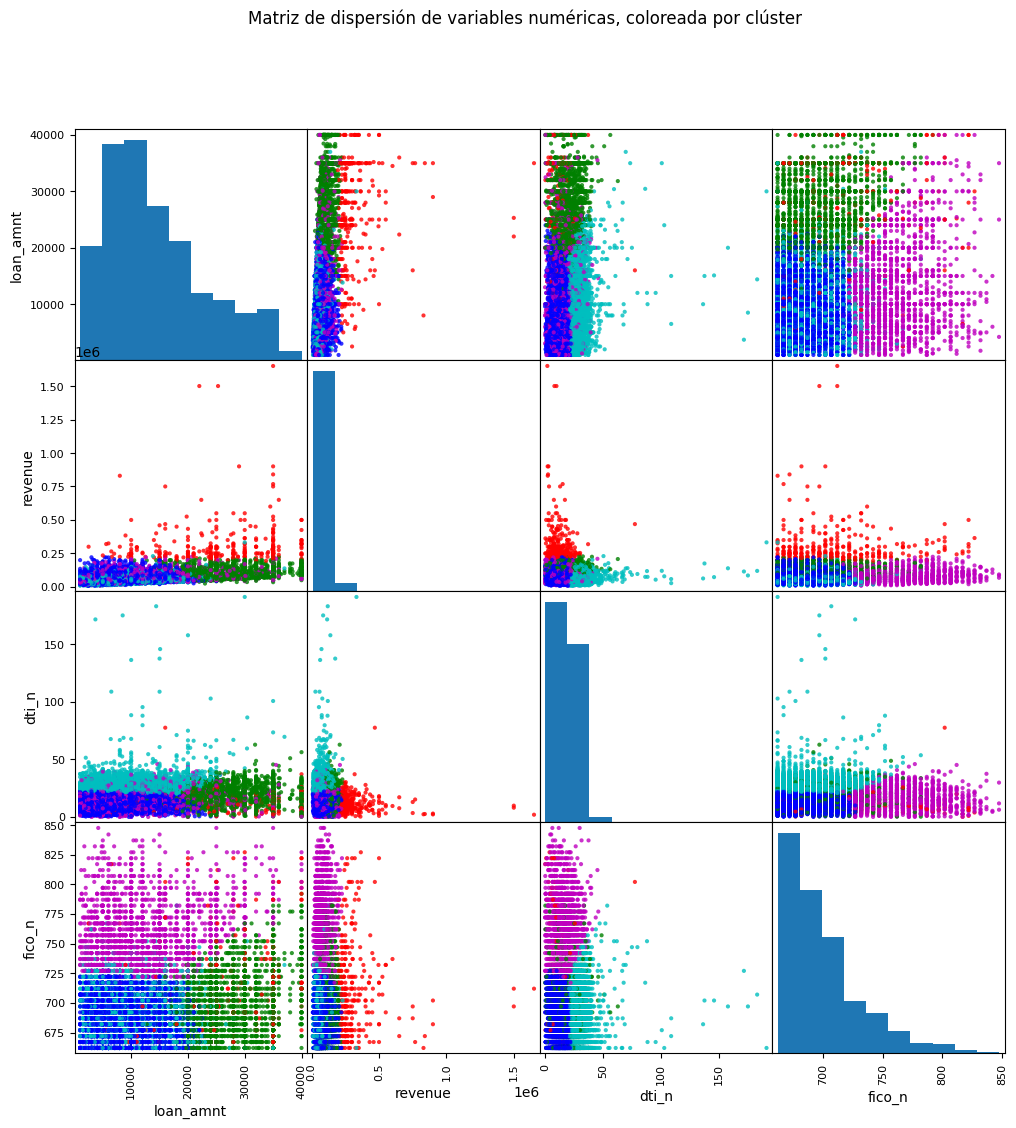

In [53]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Definimos un diccionario para 5 clusters: 0..4
cluster_colors = {
    0: 'r',  # rojo
    1: 'g',  # verde
    2: 'b',  # azul
    3: 'c',  # cian
    4: 'm',  # magenta
}

# Asignamos los colores mapeando la columna 'cluster'
colors = df_csv['cluster'].map(cluster_colors)

numeric_cols = ['loan_amnt', 'revenue', 'dti_n', 'fico_n']

scatter_matrix(
    df_csv[numeric_cols],
    figsize=(12, 12),
    diagonal='hist',
    c=colors,   # ojo: c=colors, no color=colors
    alpha=0.8
)

plt.suptitle("Matriz de dispersi√≥n de variables num√©ricas, coloreada por cl√∫ster")
plt.show()


Observando los grupos m√°s dfierenciados son el azul oscuro y el rojo, que corresponden con los ingresos menos elevados y mas elevados respectivamente y tambi√©n con el √≠ndice de endeudamiento mayor y menor.

En contraposici√≥n, los que menos parecen distinguirse son el azul y el cian, debido a que comparten caracter√≠sticas como ingresos bajos y pr√©stamos solicitados bajos.